In [7]:
!pip install git+https://github.com/Telcrome/ai-trainer@master
from trainer.ml import Dataset
from trainer import BinaryType, download_and_extract

  Cloning https://github.com/Telcrome/ai-trainer (to revision master) to c:\users\rapha\appdata\local\temp\pip-req-build-s9cepyvb


  Running command git clone -q https://github.com/Telcrome/ai-trainer 'C:\Users\rapha\AppData\Local\Temp\pip-req-build-s9cepyvb'
    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\rapha\Desktop\ai-trainer\envs\python.exe' -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\rapha\\AppData\\Local\\Temp\\pip-req-build-s9cepyvb\\setup.py'"'"'; __file__='"'"'C:\\Users\\rapha\\AppData\\Local\\Temp\\pip-req-build-s9cepyvb\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\rapha\AppData\Local\Temp\pip-req-build-s9cepyvb\pip-egg-info'
         cwd: C:\Users\rapha\AppData\Local\Temp\pip-req-build-s9cepyvb\
    Complete output (8 lines):
    running egg_info
    creating C:\Users\rapha\AppData\Local\Temp\pip-req-build-s9cepyvb\pip-egg-info\ai_trainer.egg-info
    writing C:\Users\rapha\AppData\Local\Temp\

## Load a dataset from an online resource

A dataset can be loaded as following, using a direct path to a zipfile:

In [3]:
ds_path = download_and_extract(
    online_url='https://rwth-aachen.sciebo.de/s/1qO95mdEjhoUBMf/download',
    parent_dir='./data', # Your local data folder
    dir_name='crucial_ligament_diagnosis' # Name of the dataset
)
ds = Dataset.from_disk(ds_path)
ds

The local copy already exists: https://rwth-aachen.sciebo.de/s/1qO95mdEjhoUBMf/download at ./data\crucial_ligament_diagnosis


Representation of crucial_ligament_diagnosis:
Last saved at ./data\crucial_ligament_diagnosis
Binaries: 0
{
    "subjects": [
        "6467-8694-6747-6198-0649-5686",
        "7871-9226-4338-3838-9267-0287",
        "2070-7600-3444-1705-5615-9871",
        "1688-2843-0792-6255-7859-7928",
        "0796-5560-0671-6034-2870-5295",
        "2127-8074-9460-2820-9906-4404"
    ],
    "splits": {},
    "classes": {
        "cruciate_ligament": {
            "class_type": "ordinal",
            "values": [
                "healthy",
                "partial_rupture",
                "rupture"
            ]
        }
    },
    "structure_templates": {
        "us_bone": {
            "femur": "line",
            "tibia": "line"
        }
    }
}

## See whats inside the dataset 
First just visualize some content of one subject

In [4]:
g = ds.get_subject_gen()
one_subject = next(g)
videos = one_subject.get_image_stack_keys()
first_video_name = videos[0]

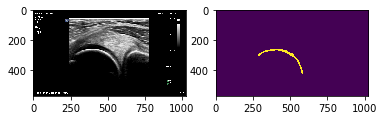

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
my_frame = 0
segmentation_name = "femur"

frame = one_subject.get_binary(first_video_name)[my_frame]

struct_index = list(one_subject.get_binary_model(first_video_name)["meta_data"]["structures"].keys()).index(segmentation_name)
mask_condition = lambda x: x['binary_type'] == BinaryType.ImageMask.value and x['meta_data']['mask_of'] == first_video_name and x['meta_data']['frame_number'] == my_frame 
mask_names = one_subject.get_binary_list_filtered(mask_condition)[0]
mask = one_subject.get_binary(mask_names)[:, :, struct_index]

plt.subplot(1, 2, 1)
plt.imshow(frame)
plt.subplot(1, 2, 2)
plt.imshow(mask)
plt.show()

## Iterate through the dataset

If you want to export some information of the dataset
you can iterate through the subjects in deterministic order
as following:

In [6]:
# Iterate through every subject, use this e.g. for exporting
g = ds.get_subject_gen()
for s in g:
    print(s.name)

6467-8694-6747-6198-0649-5686
7871-9226-4338-3838-9267-0287
2070-7600-3444-1705-5615-9871
1688-2843-0792-6255-7859-7928
0796-5560-0671-6034-2870-5295
2127-8074-9460-2820-9906-4404
